In [72]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt_tab')

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/prachethanmallemula/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [34]:
# Load Data
df=pd.read_csv("Mozzrella .csv")
print(df.head())

                                              Review  Unnamed: 1
0  Bought the product almost 2 weeks ago. Had kep...         NaN
1      I received a stale product. Very Disappointed         NaN
2  Completely stale and smells of Sour milk. DO N...         NaN
3           went stale within a day.very bad product         NaN
4                       Got fungus over it in a week         NaN


In [36]:
# Preprocessing Function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    return text

df['cleaned_reviews'] = df['Review'].apply(clean_text)

In [86]:
# Initialize Sentiment Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/prachethanmallemula/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [40]:
# Sentiment Analysis
df['sentiment_score'] = df['cleaned_reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])


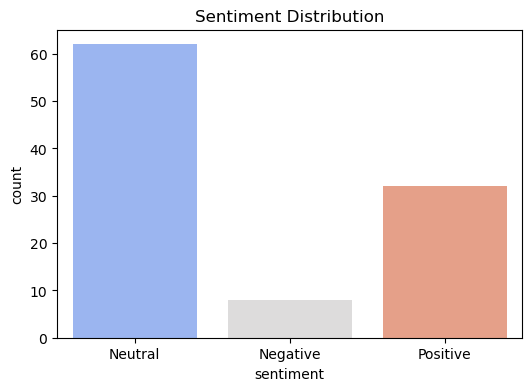

In [42]:
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral')
# 1. **Sentiment Distribution**
plt.figure(figsize=(6,4))
sns.countplot(x=df['sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()

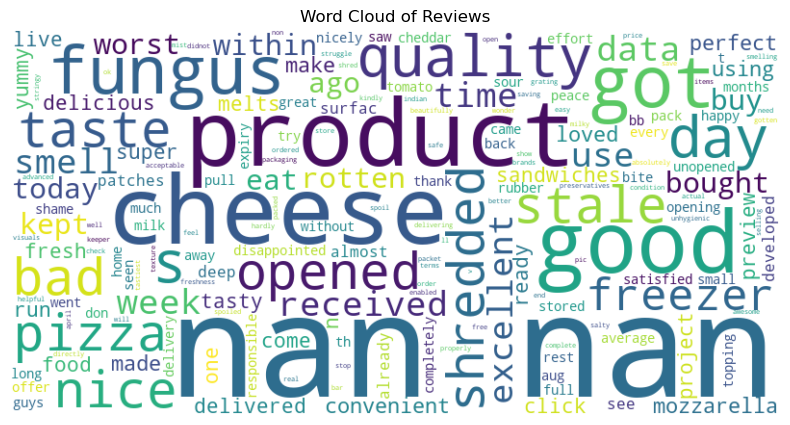

In [44]:
# 2. **Word Cloud**
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['cleaned_reviews']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()


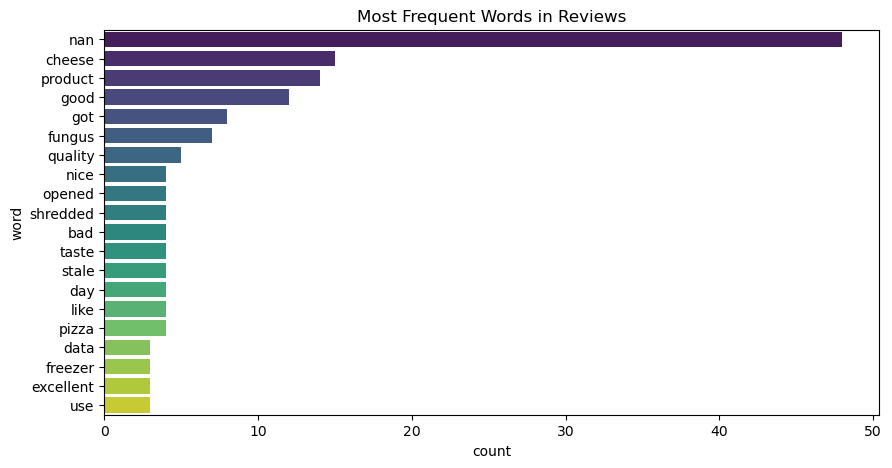

In [45]:
# 3. **Keyword Frequency Analysis**
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_reviews'])
word_freq = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': np.asarray(X.sum(axis=0)).ravel()})
word_freq = word_freq.sort_values(by='count', ascending=False).head(20)

plt.figure(figsize=(10,5))
sns.barplot(x='count', y='word', data=word_freq, palette='viridis')
plt.title('Most Frequent Words in Reviews')
plt.show()


In [48]:
# 5. **Topic Modeling (LDA)**
num_topics = 3  # Adjust as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
X_topics = lda.fit_transform(X)

terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}: ", [terms[i] for i in topic.argsort()[:-6:-1]])

Topic 1:  ['cheese', 'nice', 'taste', 'excellent', 'tasty']
Topic 2:  ['good', 'cheese', 'product', 'shredded', 'like']
Topic 3:  ['nan', 'product', 'got', 'fungus', 'quality']


In [50]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [74]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prachethanmallemula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prachethanmallemula/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
# Ensure the dataframe exists
if 'df' not in locals():
    raise ValueError("The dataframe 'df' is not defined. Please load your dataset first.")

# Check if 'sentiment' column exists
if 'sentiment' not in df.columns:
    raise KeyError("The column 'sentiment' is missing from the dataset. Check the column names using df.columns")

# Filter negative reviews
negative_reviews = df[df['sentiment'] == 'Negative']

# Ensure there are negative reviews before proceeding
if negative_reviews.empty:
    raise ValueError("No negative reviews found in the dataset.")

# Convert to text
all_negative_text = " ".join(negative_reviews['Review'].astype(str))

# Print a sample to verify
print(all_negative_text[:500])  # Show first 500 characters of negative reviews


# Combine all negative reviews into one text
all_negative_text = " ".join(negative_reviews['Review'].astype(str))


I received a stale product. Very Disappointed went stale within a day.very bad product worst quality product I have ever seen ....shame on you guys ...When I opened it bad smell comes to me ...it its rotten ...????? Very bad and worst I received it and same day I have try to use it, it smell was very bad and I eat small peace taste was not good when I eat after so... very easy to use.. No need to struggle grating the cheese bar.. Tasty The packet has come open from one end. Not acceptable! it go


In [76]:
# Tokenize and remove stopwords
words = word_tokenize(all_negative_text.lower())
filtered_words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

In [78]:
# Count word frequency
word_freq = Counter(filtered_words)
top_words = dict(word_freq.most_common(20))  # Get top 20 words


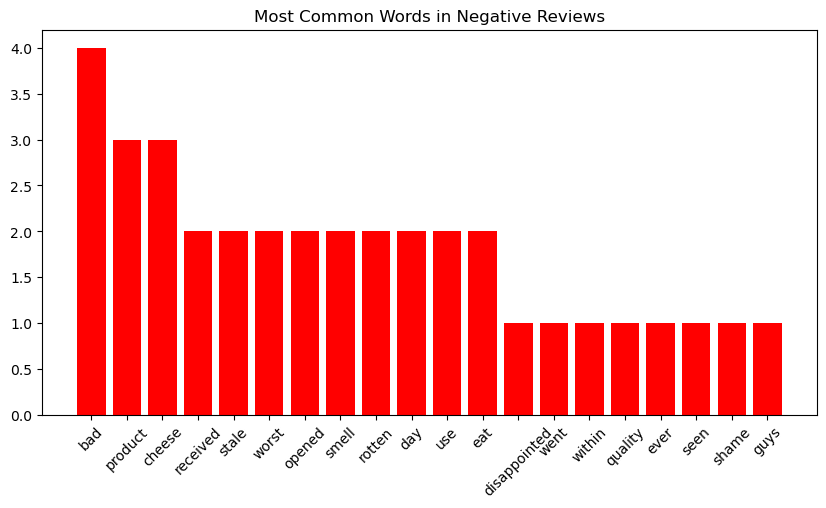

In [80]:
# Plot bar chart
plt.figure(figsize=(10,5))
plt.bar(top_words.keys(), top_words.values(), color='red')
plt.xticks(rotation=45)
plt.title("Most Common Words in Negative Reviews")
plt.show()


In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
